# Effects of Credit Scores and Income on Loan Payments
## by Gloria V

## Investigation Overview

I wanted to see how correlated were the Credit Scores and Prosper Ratings with the actual maintenance of the Loan. In other words, how accurate the Ratings have been in the prediction of the loan health.

## Dataset Overview

The dataset has 113,937 loans with 81 features. A good amount of the attributes are numeric as it would be expected for a financial dataset. There are also boolean attributes as well as some defined as objects. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set(rc={'figure.figsize':(11.7,8.27)})
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# Consolodate Loan Status Function
pastDueList = ['Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)']
exceptions = []
def LoanStatus(loan):
    try:
        if loan.LoanStatus in pastDueList:
            return 'Past Due'
        elif loan.LoanStatus == 'FinalPaymentInProgress':
            return 'Current'
        else:
            return loan.LoanStatus
    except:
        exceptions.append(loan.ListingNumber)

In [5]:
# Apply function
df['LoanStatusSummary'] = df.apply(LoanStatus, axis = 1)

In [6]:
# Drop cancelled records
to_drop = df.query('LoanStatusSummary == "Cancelled"').index.values
df.drop(to_drop, inplace=True)

In [7]:
# pre graph
type_counts = df['LoanStatusSummary'].value_counts()
type_order = type_counts.index

## Distribution of Loans by Status

In the graphic below we can see the distribution of the Status of Loans. How would you feel is either investor or potential borrower? I kind of not feel reassured with the amount of loans Charged off, Defaulted and Past Due. 

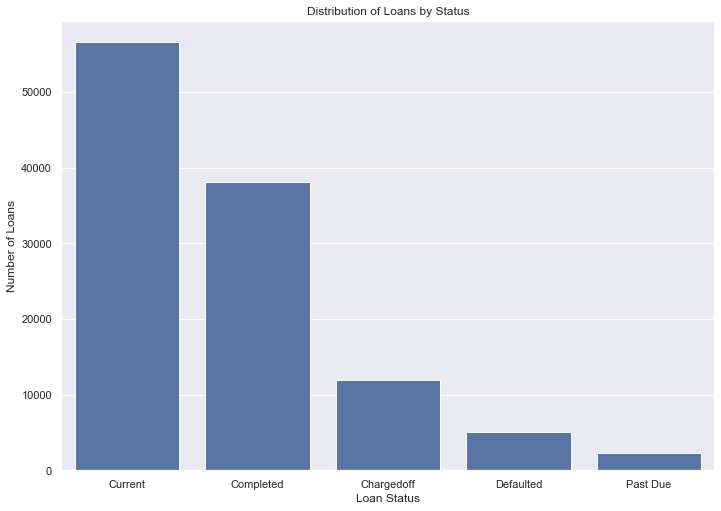

In [8]:
# build graph
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'LoanStatusSummary', color = base_color, order = type_order);
plt.title('Distribution of Loans by Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans');

In [9]:
to_drop = df.query('CreditScoreRangeLower == 0').index.values
df.drop(to_drop, inplace=True)

In [10]:
def CreditScoreSummary(loan):
    if loan.CreditScoreRangeLower <= 680:
        return 'Below Average'
    else:
        return 'Above Average'
df['CreditScoreSummary'] = df.apply(CreditScoreSummary, axis = 1)

In [11]:
to_drop = df.query('StatedMonthlyIncome > 30000').index.values
df.drop(to_drop, inplace=True)

In [12]:
level_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_cat)

### Loan Status vs. Stated Monthly Income

Based on the plot shown below, I can see that they are kind of homogeneous between each other. 

There is no outstanding difference between the status a loan is maintained and the reported monthly income.


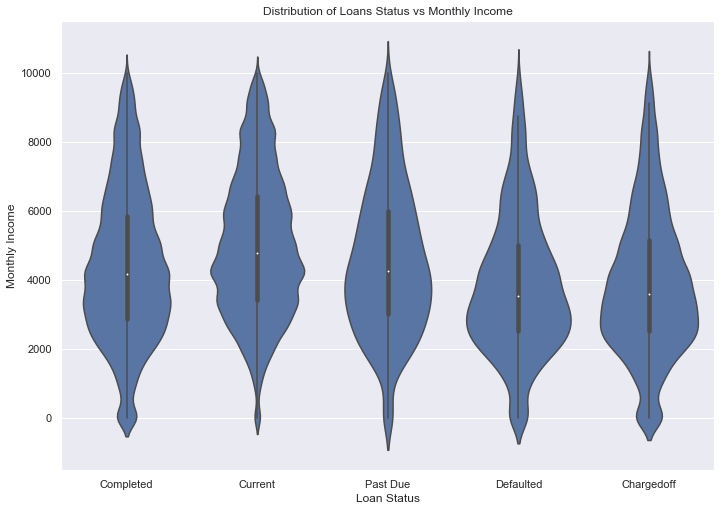

In [13]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df[df['StatedMonthlyIncome'] < 10000], 
                    x = 'LoanStatusSummary', y = 'StatedMonthlyIncome', color = base_color)
plt.title('Distribution of Loans Status vs Monthly Income')
plt.ylabel('Monthly Income')
plt.xlabel('Loan Status');

### Loan Status vs. Credit Score

In this graph we can see that for all Loan Status except Current, the Credit Score Below Average is more prevalent. That ratio is more prevalent on the Charged Off and Defaulted Loans. 

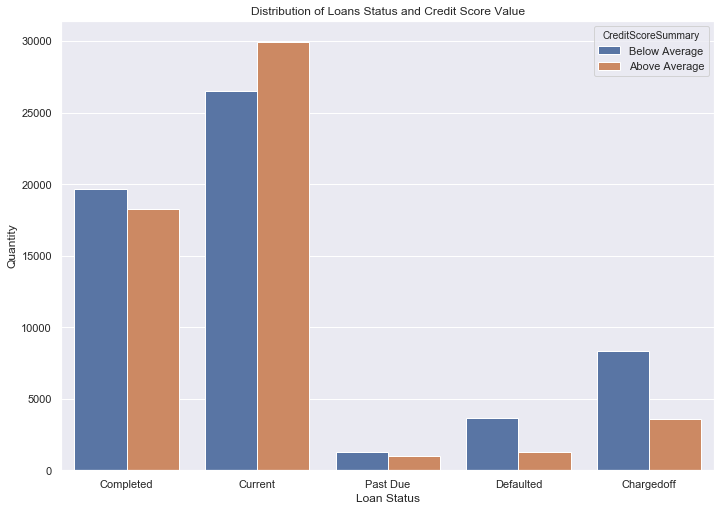

In [14]:
sb.countplot(data = df, x = 'LoanStatusSummary', hue = 'CreditScoreSummary')
plt.title('Distribution of Loans Status and Credit Score Value')
plt.ylabel('Quantity')
plt.xlabel('Loan Status');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!